In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
house = pd.read_csv('kc_house_data.csv')
test = pd.read_csv('kc_house_data.csv')
data=pd.read_csv('kc_house_data.csv')

In [3]:
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
house.drop(['date','id','long','lat'], axis=1,inplace=True)

In [5]:
house.drop(house[house['bedrooms']>30].index,inplace=True)

In [6]:
abnormal= [239,2411,7280,7319,10963,10980,11159,11217,12777,13419,15246,19452]


In [7]:
house.drop(abnormal,inplace=True)

# Feature Selection

## Sqft_living15

In [8]:
bigger=[]
for idx,row in house.iterrows():
    if row['sqft_living15']<row['sqft_living']:
        bigger.append(1)
    else:
        bigger.append(0)
house['bigger']=bigger

## Living Ratio

In [9]:
a=[]
for idx,row in house.iterrows():
    try:
        b=(row['sqft_above']/row['sqft_basement'])
        if b!= float("inf"):
            a.append(b)
        else:
            a.append(0)
    except:
        a.append(0)
house['living ratio']=a

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


In [10]:
house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,bigger,living ratio
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,0,0.000000
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,1,5.425000
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,0,0.000000
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,1,1.153846
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,0,0.000000
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,1,0.000000
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,0,0.000000
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,1,0.000000


## Room

In [11]:
a=[]
for idx,row in house.iterrows():
    a.append(row['bedrooms']*row['bathrooms'])
house['rooms']=a

## Age

In [12]:
age=[]
for i in house['yr_built']:
    age.append(2015-i)
house['age']=age
        

## Renovated

In [13]:
ren=[]
for i in house['yr_renovated']:
    if i == 0:
        ren.append(0)
    else:
        ren.append(1)
house['renovated']=ren

## Floor

In [14]:
floor=[]
for i in house['floors']:
    floor.append(int(round(i,0)))
house['floor']=floor

## Zipcode

In [15]:
price_zipcode=pd.DataFrame(house.groupby("zipcode").mean()['price'])
#mean_price_of_house == 5.400881e+05
price_zipcode

,price
zipcode,
98001,2.808047e+05
98002,2.342840e+05
98003,2.928567e+05
98004,1.352631e+06
98005,8.101649e+05
...,...
98177,6.761854e+05
98178,3.106128e+05
98188,2.890783e+05


In [16]:
expensive_zip=price_zipcode[price_zipcode['price']>=5.40081e+5].index
wealthy_neighbourhood=[]
for i in house['zipcode']:
    if i in expensive_zip:
        wealthy_neighbourhood.append(1)
    else:
        wealthy_neighbourhood.append(0)
house['wealthy_neighbourhood']=wealthy_neighbourhood
  

In [17]:
house_drop=house.drop(['zipcode',
                         'sqft_living15','sqft_above','sqft_basement','yr_built','yr_renovated'
                        ,'floors','sqft_lot15','rooms'],axis=1)

In [18]:
pd.set_option('display.max_columns', None)
house_drop

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,bigger,living ratio,age,renovated,floor,wealthy_neighbourhood
0,221900.0,3,1.00,1180,5650,0,0,3,7,0,0.000000,60,0,1,0
1,538000.0,3,2.25,2570,7242,0,0,3,7,1,5.425000,64,1,2,0
2,180000.0,2,1.00,770,10000,0,0,3,6,0,0.000000,82,0,1,0
3,604000.0,4,3.00,1960,5000,0,0,5,7,1,1.153846,50,0,1,1
4,510000.0,3,2.00,1680,8080,0,0,3,8,0,0.000000,28,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,0,0,3,8,0,0.000000,6,0,3,1
21609,400000.0,4,2.50,2310,5813,0,0,3,8,1,0.000000,1,0,2,0
21610,402101.0,2,0.75,1020,1350,0,0,3,7,0,0.000000,6,0,2,1
21611,400000.0,3,2.50,1600,2388,0,0,3,8,1,0.000000,11,0,2,1


In [19]:
target=house_drop['price']

## OUTLIER

In [20]:
from mahalanobis import Mahalanobis


In [21]:
house_drop

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,bigger,living ratio,age,renovated,floor,wealthy_neighbourhood
0,221900.0,3,1.00,1180,5650,0,0,3,7,0,0.000000,60,0,1,0
1,538000.0,3,2.25,2570,7242,0,0,3,7,1,5.425000,64,1,2,0
2,180000.0,2,1.00,770,10000,0,0,3,6,0,0.000000,82,0,1,0
3,604000.0,4,3.00,1960,5000,0,0,5,7,1,1.153846,50,0,1,1
4,510000.0,3,2.00,1680,8080,0,0,3,8,0,0.000000,28,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,0,0,3,8,0,0.000000,6,0,3,1
21609,400000.0,4,2.50,2310,5813,0,0,3,8,1,0.000000,1,0,2,0
21610,402101.0,2,0.75,1020,1350,0,0,3,7,0,0.000000,6,0,2,1
21611,400000.0,3,2.50,1600,2388,0,0,3,8,1,0.000000,11,0,2,1


In [22]:
house_drop['price']=target

In [23]:
data=house_drop.drop('price',axis=1)

In [24]:
house_drop['Mahalanobis']=Mahalanobis(np.array(house_drop),len(house_drop)).distances

In [25]:
from scipy.stats import chi2
chi2.ppf((1-0.05),df=14)

23.684791304840576

In [26]:
chi2.cdf(house_drop['Mahalanobis'],14)

array([0.00013205, 0.02665306, 0.00031746, ..., 0.0047867 , 0.00097367,
       0.00435976])

In [27]:
house_drop['p-value']= 1-chi2.cdf(house_drop['Mahalanobis'],11)


In [28]:
def name_outlier(col):
    if col<0.05:
        return'outlier'
    else:
        return 'not outlier'
house_drop['Out']=house_drop['p-value'].apply(name_outlier)

In [29]:
house_drop[house_drop['Out']=='outlier']

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,bigger,living ratio,age,renovated,floor,wealthy_neighbourhood,Mahalanobis,p-value,Out
1719,700000.0,4,1.00,1300,1651359,0,3,4,6,0,0.000000,95,0,1,0,41.046509,0.000024,outlier
3914,7062500.0,5,4.50,10040,37325,1,2,3,11,1,3.254237,75,1,2,1,26.149097,0.006166,outlier
3949,998000.0,4,3.25,3770,982998,0,0,3,10,1,0.000000,23,0,2,0,23.820839,0.013510,outlier
4441,790000.0,2,3.00,2560,982278,0,0,3,8,1,0.000000,11,0,1,0,24.046993,0.012537,outlier
4540,550000.0,3,2.00,3650,843309,0,0,4,7,1,0.000000,24,0,2,0,20.532651,0.038549,outlier
6691,1998000.0,2,2.50,3900,920423,0,0,3,12,1,0.000000,6,0,2,0,23.173919,0.016703,outlier
7077,1650000.0,4,3.25,3920,881654,0,3,3,11,1,0.000000,13,0,3,1,21.920190,0.024999,outlier
7252,7700000.0,6,8.00,12050,27600,0,3,4,13,1,2.462644,105,1,2,1,27.179560,0.004317,outlier
7647,542500.0,5,3.25,3010,1074218,0,0,5,8,1,2.010000,84,0,2,1,26.754456,0.005004,outlier
7769,855000.0,4,3.50,4030,1024068,0,0,3,10,1,0.000000,9,0,2,0,24.724482,0.010002,outlier


In [30]:
outlier_idx=house_drop[house_drop['Out']=='outlier'].index

In [31]:
house_drop.drop(outlier_idx,inplace=True)

## Decision Tree Regressor

In [32]:
house_drop.drop(['Mahalanobis','p-value','Out'],axis=1,inplace=True)

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
house_drop

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,bigger,living ratio,age,renovated,floor,wealthy_neighbourhood
0,221900.0,3,1.00,1180,5650,0,0,3,7,0,0.000000,60,0,1,0
1,538000.0,3,2.25,2570,7242,0,0,3,7,1,5.425000,64,1,2,0
2,180000.0,2,1.00,770,10000,0,0,3,6,0,0.000000,82,0,1,0
3,604000.0,4,3.00,1960,5000,0,0,5,7,1,1.153846,50,0,1,1
4,510000.0,3,2.00,1680,8080,0,0,3,8,0,0.000000,28,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,0,0,3,8,0,0.000000,6,0,3,1
21609,400000.0,4,2.50,2310,5813,0,0,3,8,1,0.000000,1,0,2,0
21610,402101.0,2,0.75,1020,1350,0,0,3,7,0,0.000000,6,0,2,1
21611,400000.0,3,2.50,1600,2388,0,0,3,8,1,0.000000,11,0,2,1


In [35]:
#house_drop.drop(['rooms','sqft_lot'],axis=1,inplace=True)

In [36]:
data=house_drop.drop('price',axis=1)

In [37]:
data

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,bigger,living ratio,age,renovated,floor,wealthy_neighbourhood
0,3,1.00,1180,5650,0,0,3,7,0,0.000000,60,0,1,0
1,3,2.25,2570,7242,0,0,3,7,1,5.425000,64,1,2,0
2,2,1.00,770,10000,0,0,3,6,0,0.000000,82,0,1,0
3,4,3.00,1960,5000,0,0,5,7,1,1.153846,50,0,1,1
4,3,2.00,1680,8080,0,0,3,8,0,0.000000,28,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,0,0,3,8,0,0.000000,6,0,3,1
21609,4,2.50,2310,5813,0,0,3,8,1,0.000000,1,0,2,0
21610,2,0.75,1020,1350,0,0,3,7,0,0.000000,6,0,2,1
21611,3,2.50,1600,2388,0,0,3,8,1,0.000000,11,0,2,1


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, house_drop['price'], test_size=0.2,random_state=101)

In [39]:
dtree_reg = DecisionTreeRegressor(criterion='mse',max_depth=8)
dtree_reg.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
from sklearn import metrics
predicted=dtree_reg.predict(X_test)
r=metrics.r2_score(y_test,predicted)
r

0.7258823632663545

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

In [42]:
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print ('MSE: %2.3f' % mse)
    return mse

In [43]:
scoring=['neg_mean_squared_error','r2']

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split':[4,6,8,10],
              'max_depth':[5,8,10],
              "min_samples_leaf": [2,3,5,8],
              "max_leaf_nodes": [120,180,200]
              }

grid_cv_dtm = GridSearchCV(dtree_reg, param_grid, cv=3,n_jobs=-1,scoring=scoring[0])

grid_cv_dtm.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=8, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10],
                         'max_leaf_nodes': [120, 180, 200],
                         'min_samples_leaf': [2, 3

# Grid Cv dtm 1

In [45]:
grid_cv_dtm.best_params_

{'max_depth': 10,
 'max_leaf_nodes': 180,
 'min_samples_leaf': 8,
 'min_samples_split': 4}

In [46]:
grid_cv_dtm.best_score_

-32786596362.27969

In [47]:
np.sqrt(abs(grid_cv_dtm.best_score_))

181070.69437730583

In [48]:
from sklearn import metrics
predicted=grid_cv_dtm.best_estimator_.predict(X_test)
r=metrics.r2_score(y_test,predicted)
r

0.7375642774025866

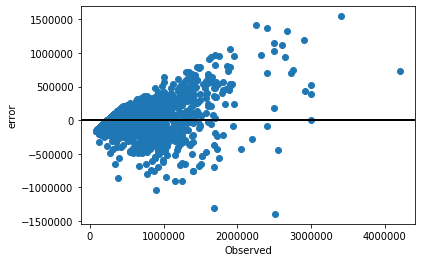

In [50]:
predicted = grid_cv_dtm.best_estimator_.predict(X_test)
residuals = y_test-predicted

fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('error')
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split

r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, X_test, y_test, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, X_test, y_test, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

avg R-squared::0.672
MSE::-36594649043.727
RMSE: 171576.80161986555


In [52]:
target=house_drop['price']

[[0.81955751 0.82161761 0.81264603 0.82230479 0.82230479 0.82230479
  0.82230479]
 [0.81672623 0.82391061 0.81859049 0.82389443 0.81666026 0.81666026
  0.81666026]
 [0.82228283 0.82439071 0.82067843 0.82483497 0.82115019 0.82115019
  0.82115019]
 [0.81934386 0.81961554 0.81818022 0.82561005 0.82022401 0.82022401
  0.82022401]
 [0.8198737  0.8206331  0.81996166 0.82256211 0.82283548 0.82285534
  0.82285534]
 [0.82055717 0.82075833 0.82292995 0.8212906  0.82145852 0.82217491
  0.82217491]
 [0.82371421 0.82279029 0.81865511 0.82231997 0.81992283 0.8172934
  0.8172934 ]
 [0.82041818 0.8244059  0.82601566 0.81874212 0.81814177 0.82263687
  0.81933739]
 [0.81937256 0.8210337  0.82192349 0.81922037 0.8221887  0.82313635
  0.81660972]
 [0.81413695 0.82233038 0.82575856 0.81867468 0.81677825 0.81740725
  0.82503727]]
[0.82043433 0.81901465 0.82223393 0.82048881 0.82165382 0.82162063
 0.82028417 0.82138541 0.82049784 0.82001762]
[ 9249 10276 11304 12332 13359 14387 15414 16442 17470 18498]


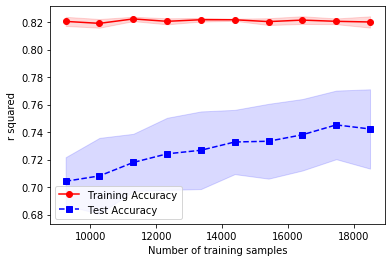

In [53]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=grid_cv_dtm.best_estimator_,
                                                       X=data,
                                                       y=target,
                                                       train_sizes=np.linspace(0.5, 1.0, 10),
                                                       cv=7)

print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')

# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('r squared')
plt.legend()
plt.show()

Cross validation scores: [0.74234693 0.73754037 0.76275176 0.72036754 0.77596533 0.72466806
 0.75409624 0.67076133]


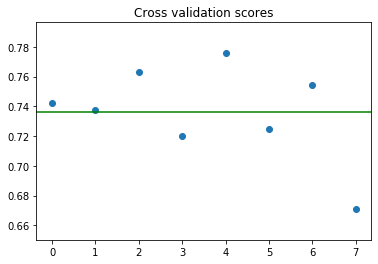

In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=grid_cv_dtm.best_estimator_,
                        X=data,
                        y=target,
                        cv=8,
                        n_jobs=1,
                        scoring='r2')

print('Cross validation scores: {}'.format(scores))

plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g') # Mean value of cross validation scores
plt.show()

# Change Feature

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25,random_state=101)

In [ ]:
dtree_reg = DecisionTreeRegressor(criterion='mse',max_depth=8)
dtree_reg.fit(X_train,y_train)


In [ ]:
from sklearn import metrics
predicted=dtree_reg.predict(X_test)
r=metrics.r2_score(y_test,predicted)
r

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split':[4,6,8,10],
              'max_depth':[5,8,10],
              "min_samples_leaf": [3,5,8,10],
              "max_leaf_nodes": [75,100,120,180]
              }

grid_cv_dtm2 = GridSearchCV(dtree_reg, param_grid, cv=3,n_jobs=-1)

grid_cv_dtm2.fit(X_train,y_train)

In [ ]:
grid_cv_dtm2.best_params_

In [ ]:
grid_cv_dtm2.best_score_

In [ ]:
from sklearn import metrics
predicted=grid_cv_dtm2.best_estimator_.predict(X_test)
r=metrics.r2_score(y_test,predicted)
r

In [ ]:
predicted = grid_cv_dtm2.best_estimator_.predict(X_test)
residuals = y_test-predicted

fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split

r2_scores = cross_val_score(grid_cv_dtm2.best_estimator_, X_test, y_test, cv=10)
mse_scores = cross_val_score(grid_cv_dtm2.best_estimator_, X_test, y_test, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))
print("Rmse score : {}".format(np.sqrt(mean_squared_error(predicted,y_test))))

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=grid_cv_dtm2.best_estimator_,
                                                       X=data,
                                                       y=target,
                                                       train_sizes=np.linspace(0.5, 1.0, 10),
                                                       cv=7)

print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')

# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('r squared')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=grid_cv_dtm2.best_estimator_,
                        X=data,
                        y=target,
                        cv=8,
                        n_jobs=1,
                        scoring='r2')

print('Cross validation scores: {}'.format(scores))

plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g') # Mean value of cross validation scores
plt.show()

In [55]:
import pickle

In [56]:
filename = 'Kingtree_dt_model.sav'
pickle.dump(grid_cv_dtm.best_estimator_,open(filename,'wb'))

In [57]:
house_drop

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,bigger,living ratio,age,renovated,floor,wealthy_neighbourhood
0,221900.0,3,1.00,1180,5650,0,0,3,7,0,0.000000,60,0,1,0
1,538000.0,3,2.25,2570,7242,0,0,3,7,1,5.425000,64,1,2,0
2,180000.0,2,1.00,770,10000,0,0,3,6,0,0.000000,82,0,1,0
3,604000.0,4,3.00,1960,5000,0,0,5,7,1,1.153846,50,0,1,1
4,510000.0,3,2.00,1680,8080,0,0,3,8,0,0.000000,28,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,0,0,3,8,0,0.000000,6,0,3,1
21609,400000.0,4,2.50,2310,5813,0,0,3,8,1,0.000000,1,0,2,0
21610,402101.0,2,0.75,1020,1350,0,0,3,7,0,0.000000,6,0,2,1
21611,400000.0,3,2.50,1600,2388,0,0,3,8,1,0.000000,11,0,2,1


## XGB REGRESSOR

In [58]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [59]:
data_dmatrix = xgb.DMatrix(data=data,label=target)



/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [60]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 5, n_estimators = 100,subsample=0.7)

In [61]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,bigger,living ratio,age,renovated,floor,wealthy_neighbourhood
227,4,2.25,1720,9753,0,0,4,7,1,1.866667,37,0,1,0
327,4,2.00,2050,4400,0,0,4,9,0,0.000000,93,0,2,1
15745,4,2.75,4030,10888,0,0,3,10,1,0.000000,18,0,2,1
7233,3,2.25,1530,6600,0,0,4,7,1,4.275862,47,0,1,0
15556,3,2.50,1770,2875,0,0,3,8,0,0.000000,25,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,5,4.75,6390,13180,0,0,3,10,1,2.491803,75,0,2,1
8020,4,2.75,1540,4840,0,2,4,7,1,1.231884,86,0,1,0
17770,4,2.50,3700,12500,0,0,5,8,1,1.078652,42,0,1,1
17956,4,3.50,3150,5500,0,0,3,9,1,0.000000,1,0,2,1


In [62]:
xg_reg.fit(X_train,y_train)



[13:34:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [110]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,bigger,living ratio,age,renovated,floor,wealthy_neighbourhood
10209,3,2.00,1800,43995,0,0,3,8,0,0.000000,27,0,2,1
3387,2,1.00,1430,8157,0,0,3,7,0,4.107143,71,0,2,1
8430,4,2.75,2600,6050,0,0,5,8,1,3.062500,66,0,2,1
479,4,2.75,2910,10650,0,2,3,8,0,1.575221,40,0,1,1
18192,4,1.00,2020,18150,0,0,4,7,1,0.000000,60,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,4,1.00,1980,7015,0,0,3,7,1,1.750000,42,0,1,0
17870,3,1.75,2880,18296,0,0,3,8,1,1.215385,57,0,1,0
6595,3,2.50,2250,9608,0,0,3,8,1,0.000000,21,0,2,0
18895,3,1.00,1050,5156,0,0,3,7,0,0.000000,96,0,2,0


In [88]:
head=['renovated', 'bigger', 'age', 'grade', 'view', 'condition', 'sqft_living', 'living ratio', 'wealthy_neighbourhood', 
'bathrooms', 'sqft_lot', 'waterfront', 'floor', 'bedrooms']

In [121]:
head2=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'bigger', 
        'living ratio', 'age', 'renovated', 'floor', 'wealthy_neighbourhood']

In [137]:
pd.DataFrame(data=[head2],columns=head)

,renovated,bigger,age,grade,view,condition,sqft_living,living ratio,wealthy_neighbourhood,bathrooms,sqft_lot,waterfront,floor,bedrooms
0,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,bigger,living ratio,age,renovated,floor,wealthy_neighbourhood


In [127]:
a=pd.DataFrame()
for i in head2:
    a[i]=[X_test.iloc[1][i]]

In [128]:
b=X_test.iloc[2:3]
b

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,bigger,living ratio,age,renovated,floor,wealthy_neighbourhood
8430,4,2.75,2600,6050,0,0,5,8,1,3.0625,66,0,2,1


In [129]:
a

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,bigger,living ratio,age,renovated,floor,wealthy_neighbourhood
0,2.0,1.0,1430.0,8157.0,0.0,0.0,3.0,7.0,0.0,4.107143,71.0,0.0,2.0,1.0


In [130]:
a=a.as_matrix()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [126]:
preds = xg_reg.predict(a)

ValueError: feature_names mismatch: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'bigger', 'living ratio', 'age', 'renovated', 'floor', 'wealthy_neighbourhood'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13']
expected renovated, bigger, age, grade, view, condition, sqft_living, living ratio, wealthy_neighbourhood, bathrooms, sqft_lot, waterfront, floor, bedrooms in input data
training data did not have the following fields: f0, f13, f8, f4, f3, f10, f7, f9, f2, f6, f11, f1, f5, f12

In [118]:
preds

array([840407.75], dtype=float32)

In [117]:
test=np.array([3,2,1800,44000,0,0,3,8,0,0,27,0,2,1])

array(1)

In [65]:

r=metrics.r2_score(y_test,preds)
r

0.7774751240509964

In [66]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 157992.465476


In [67]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 5, 'alpha': 100}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[13:34:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {'subsample': [0.55,0.6,0.65],
              'learning_rate': [0.05,0.1,0.2],
              'max_depth': [5,8],
              'alpha': [2,3,5,],
              'n_estimator':[50,75,100],
              'colsample_bytree':[0.3,0.4,0.5]
             }

grid_cv_xgb = GridSearchCV(xg_reg, param_grid, cv=3,n_jobs=-1,scoring=scoring[0])

grid_cv_xgb.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
grid_cv_xgb.best_params_

In [ ]:
grid_cv_xgb.best_score_

In [ ]:
from sklearn import metrics
predicted=grid_cv_xgb.best_estimator_.predict(X_test)
r=metrics.r2_score(y_test,predicted)

print("avg R-squared::{:.3f}".format(metrics.r2_score(y_test,predicted)))
print("MSE::{:.3f}".format(metrics.mean_squared_error(y_test, predicted)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()
#calculated based on weight 

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=grid_cv_xgb.best_estimator_,
                        X=data,
                        y=target,
                        cv=8,
                        n_jobs=1,
                        scoring='r2',verbose=0)

print('Cross validation scores: {}'.format(scores))

plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g') # Mean value of cross validation scores
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=grid_cv_dtm2.best_estimator_,
                                                       X=data,
                                                       y=target,
                                                       train_sizes=np.linspace(0.5, 1.0, 10),
                                                       cv=7,verbose=3)

print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')

# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('r squared')
plt.legend()
plt.show()

In [ ]:
filename = 'Kingtree_xgb_model.sav'
pickle.dump(grid_cv_xgb.best_estimator_,open(filename,'wb'))